In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
countries_data = pd.read_excel('GDP_PPP.xls')

In [3]:
countries_data

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,21942.267486,23554.172809,24156.033900,24978.226168,26089.472258,26084.334982,25944.406820,27511.335925,...,34632.951649,36830.156611,36782.227117,37314.564389,37587.065942,38893.960556,40143.000266,39834.223903,31182.833881,NaN
1,Africa Eastern and Southern,AFE,1844.490238,1855.856704,1811.250525,1801.093516,1824.722058,1894.762323,1982.707063,2049.995425,...,3237.872226,3365.684322,3503.826534,3533.336591,3627.474284,3670.891196,3761.035160,3814.846625,3659.272868,3881.592253
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1914.774228,2015.514775,2069.424022,2087.305323,1981.118069,2058.400221,2082.392197,2152.190243,2078.479082,NaN
3,Africa Western and Central,AFW,1729.908891,1762.536827,1800.456255,1775.549715,1763.088948,1789.840690,1857.831038,1919.596490,...,3772.323802,4013.196523,4208.731780,4139.323364,4069.005667,4115.645480,4231.321093,4335.409188,4241.522499,4474.970700
4,Angola,AGO,3263.334350,3295.730956,3071.610764,2313.921780,2318.952828,2636.525014,2952.011249,3119.365502,...,7412.967137,7682.475646,8179.297828,7337.569901,7103.226249,7310.896551,7148.933253,6995.299736,6478.332182,6581.042021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8039.207976,8383.397311,8649.449499,9357.135136,10007.689234,10436.168846,11012.109663,11796.153310,11292.862651,12720.983575
262,"Yemen, Rep.",YEM,2066.359511,2161.387825,2271.682332,2297.981613,2388.575291,2470.530068,2537.762990,2630.456825,...,3491.204610,3688.519409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,7065.270348,7053.782217,6886.247717,6963.371591,7171.325677,7389.869645,7699.136406,7896.000446,...,13215.708679,13606.942896,13602.102643,13701.945390,13748.461416,13860.270166,14207.432853,14288.589886,13359.484332,14420.174317
264,Zambia,ZMB,1474.092450,1484.633685,1456.044324,1554.151167,1415.550409,1450.023660,1527.566086,1569.831079,...,3422.619937,3578.847055,3539.436390,3430.400287,3404.673990,3485.021780,3605.676095,3616.903819,3457.328102,3623.854913


The World Bank dataset includes mixed information, so there're 2 types of information in the column countries_data['Country Name']: names of the countries and aggregated information of regions, so need to split them in order to get the info only from countries.

In [5]:
region_list = ['Africa Eastern and Southern', 
 'Africa Western and Central',
 'Arab World', 
 'Central Europe and the Baltics',
 'Caribbean small states',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia',
 'Euro area',
 'European Union',
 'Early-demographic dividend',
 'Fragile and conflict affected situations',
 'High income',
 'Heavily indebted poor countries (HIPC)',
 'IBRD only',
 'IDA & IBRD total',
 'IDA total',
 'IDA blend',
 'IDA only',
 'Not classified',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low income',
 'Lower middle income',
 'Low & middle income',
 'Late-demographic dividend',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'OECD members',
 'Other small states',
 'Pre-demographic dividend',
 'Pacific island small states',
 'Post-demographic dividend',
 'South Asia',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa',
 'Small states',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Upper middle income',
 'World',
 ]

In [6]:
region_data = countries_data.loc[countries_data['Country Name'].isin(region_list)]
countries_data = countries_data.loc[~countries_data['Country Name'].isin(region_list)]

Let's find out the % of the countries which provided their data to the World Bank:

In [8]:
countries_data[[2021]].count()

2021    180
dtype: int64

In [9]:
countries_data[[2021]].count()/countries_data['Country Name'].count()

2021    0.821918
dtype: float64

As a result we can claim that the world bank calculates GDP PPP per capita for ~85% of countries in the word. 
For the purpose of simplification, we drop the countries we can't get the data in 2021.


In [11]:
countries_data_2021 = countries_data[['Country Name',2021]].dropna(subset = [2021])
countries_data_2021.reset_index(drop = True, inplace = True)

In [12]:
countries_data_2021

,Country Name,2021
0,Angola,6581.042021
1,Albania,15646.041523
2,Argentina,23627.394294
3,Armenia,14630.244223
4,Antigua and Barbuda,19837.650142
...,...,...
175,Samoa,6420.354457
176,Kosovo,12720.983575
177,South Africa,14420.174317
178,Zambia,3623.854913


In [13]:
np.median(countries_data_2021[2021])

14319.982178106202

In [14]:
np.mean(countries_data_2021[2021])

23038.978084935792

We can conclude that 90 countries has GDP per capita less then 14319.98. 90 countries - more than than number. 
The average number is 23038.

As long as I'm from Belarus, I'd like to know the average GDP ppp per capita for my homecountry and compare it with other countries in a dataset

In [17]:
countries_data_2021[countries_data_2021['Country Name'] == 'Belarus']
belarus = countries_data_2021[countries_data_2021['Country Name'] == 'Belarus']
belarus

,Country Name,2021
17,Belarus,21698.574089


In [18]:
countries_data_2021[countries_data_2021[2021]> belarus.iloc[0,1]]

,Country Name,2021
2,Argentina,23627.394294
5,Australia,55807.444025
6,Austria,58427.495690
9,Belgium,58930.936327
13,Bulgaria,26705.438860
...,...,...
156,Turks and Caicos Islands,23390.473672
162,Trinidad and Tobago,26868.092719
164,Turkiye,30472.379933
169,Uruguay,24625.451344


In [19]:
#Number of countries with GDP PPP per capita bigger than Belarus:
countries_data_2021[countries_data_2021[2021]> belarus.iloc[0,1]].count().iloc[0]

65

In [20]:
#Number of countries with GDP PPP per capita smaller than Belarus:
countries_data_2021[countries_data_2021[2021]< belarus.iloc[0,1]].count().iloc[0]

114

In [21]:
import matplotlib.pyplot as plt

In [22]:
vals = [countries_data_2021[countries_data_2021[2021]> belarus.iloc[0,1]].count().iloc[0], countries_data_2021[countries_data_2021[2021]< belarus.iloc[0,1]].count().iloc[0]]
labels = ['Richer countries', 'Poorer countries']

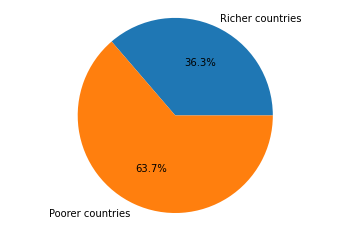

In [23]:
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis("equal")
plt.show()

It can be concluded that 36.3% of the countries have higher GPD PPP per capita than Belarus 63.7% have lower GPD PPP per capita than Belarus

Let's separate the countries into 10 different levels to find interesting insights:
Let's add the column with the rank of the country in the rating GDP_PPP_per_capita 

In [26]:
countries_data_2021['level']= np.nan
countries_data_2021['rank_GPD_PPP']= np.nan
countries_data_2021.sort_values(by = 2021, ascending = False, inplace = True)
countries_data_2021.reset_index(drop = True, inplace = True)

In [27]:
int(countries_data_2021.count().iloc[0]/10)

18

In [28]:
list_of_levels = [i for i in range(0,180,18)]
list_of_levels

[0, 18, 36, 54, 72, 90, 108, 126, 144, 162]

In [29]:
for i in range(180):
    if i< list_of_levels[1]:
        countries_data_2021.iloc[i,2]='level1'
        countries_data_2021.iloc[i,3]= i+1
    elif i< list_of_levels[2]:
        countries_data_2021.iloc[i,2]='level2'
        countries_data_2021.iloc[i,3]= i+1
    elif i< list_of_levels[3]:
        countries_data_2021.iloc[i,2]='level3'
        countries_data_2021.iloc[i,3]= i+1
    elif i< list_of_levels[4]:
        countries_data_2021.iloc[i,2]='level4'
        countries_data_2021.iloc[i,3]= i+1
    elif i<list_of_levels[5]:
        countries_data_2021.iloc[i,2]='level5'
        countries_data_2021.iloc[i,3]= i+1
    elif i< list_of_levels[6]:
        countries_data_2021.iloc[i,2]='level6'
        countries_data_2021.iloc[i,3]= i+1
    elif i< list_of_levels[7]:
        countries_data_2021.iloc[i,2]='level7'
        countries_data_2021.iloc[i,3]= i+1
    elif i< list_of_levels[8]:
        countries_data_2021.iloc[i,2]='level8'
        countries_data_2021.iloc[i,3]= i+1
    elif i< list_of_levels[9]:
        countries_data_2021.iloc[i,2]='level9'
        countries_data_2021.iloc[i,3]= i+1
    elif i>= list_of_levels[9]:
        countries_data_2021.iloc[i,2]='level10'
        countries_data_2021.iloc[i,3]= i+1


In [30]:
countries_data_2021.rank_GPD_PPP = countries_data_2021.rank_GPD_PPP.apply(np.int64)

In [31]:
countries_data_2021

,Country Name,2021,level,rank_GPD_PPP
0,Luxembourg,134753.797686,level1,1
1,Singapore,116486.473211,level1,2
2,Ireland,106455.753026,level1,3
3,Qatar,93521.441798,level1,4
4,Bermuda,85192.319290,level1,5
...,...,...,...,...
175,Niger,1309.814499,level10,176
176,Somalia,1302.452519,level10,177
177,"Congo, Dem. Rep.",1218.768128,level10,178
178,Central African Republic,1020.533165,level10,179


In [32]:
countries_data_2021.to_csv('countries_data_2021')


In [33]:
countries_data_2021_grouped = countries_data_2021.groupby('level').agg({2021:'mean'})\
                              .sort_values(by =2021,ascending = False)
countries_data_2021_grouped

,2021
level,
level1,77731.025925
level2,47926.076915
level3,33740.065989
level4,22781.563176
level5,16318.020087
level6,12836.757166
level7,8585.973574
level8,5320.839356
level9,3379.289331


In [34]:
difference_max_min = countries_data_2021_grouped.iloc[0]-countries_data_2021_grouped.iloc[9]
difference_max_min.iloc[0]

75960.8565938338

We can conclude that the difference between mean value of GDP PPP per capita in level1 and level10 is $75960.86

In [36]:
countries_data_2021.loc[countries_data_2021['level'] =='level1'][2021].std()

21911.619785170682

In [37]:
countries_data_2021

,Country Name,2021,level,rank_GPD_PPP
0,Luxembourg,134753.797686,level1,1
1,Singapore,116486.473211,level1,2
2,Ireland,106455.753026,level1,3
3,Qatar,93521.441798,level1,4
4,Bermuda,85192.319290,level1,5
...,...,...,...,...
175,Niger,1309.814499,level10,176
176,Somalia,1302.452519,level10,177
177,"Congo, Dem. Rep.",1218.768128,level10,178
178,Central African Republic,1020.533165,level10,179


In [38]:
countries_data_2021.loc[countries_data_2021['level'] =='level10'][2021].std()

554.5037572470196

In [39]:
[countries_data_2021.loc[countries_data_2021['level'] == 'level'+str(i)][2021].std() for i in range(1,11)]

[21911.619785170682,
 4741.466361301429,
 3870.6094877526816,
 2430.683820360546,
 1197.82384377962,
 1066.155840427572,
 1444.309317882823,
 746.2870512066124,
 596.728719017993,
 554.5037572470196]

We can concude that as long as the country GDP PPP per capita rises, the GDP PPP per capita in most groups rises as well.


In [41]:
countries_data_2021

,Country Name,2021,level,rank_GPD_PPP
0,Luxembourg,134753.797686,level1,1
1,Singapore,116486.473211,level1,2
2,Ireland,106455.753026,level1,3
3,Qatar,93521.441798,level1,4
4,Bermuda,85192.319290,level1,5
...,...,...,...,...
175,Niger,1309.814499,level10,176
176,Somalia,1302.452519,level10,177
177,"Congo, Dem. Rep.",1218.768128,level10,178
178,Central African Republic,1020.533165,level10,179


We'd like to find if the corruption level is correlated with the GDP PPP per capita.
With this purpose I parsed data from World economics report. 
According to this DB, the higher Corruption PerceptionIndex, the lower the level of corruption

In [43]:
title_corruption = pd.read_html('https://www.worldeconomics.com/Rankings/Economies-By-Corruption.aspx')[0].iloc[0]

In [44]:
corruption = pd.read_html('https://www.worldeconomics.com/Rankings/Economies-By-Corruption.aspx')[1]\
                  .rename(columns = title_corruption).drop('RegionRank', axis = 1)

In [45]:
corruption

,Country,GlobalRank,Corruption PerceptionIndex
0,New Zealand,1,88.0
1,Denmark,2,88.0
2,Finland,3,88.0
3,Sweden,4,85.0
4,Singapore,5,85.0
...,...,...,...
151,"Congo, Dem. Rep",152,19.0
152,Libya,153,17.0
153,Afghanistan,154,16.0
154,"Yemen, Rep.",155,16.0


In [46]:
corruprtion_GDP_PPP = corruption.merge(countries_data_2021,left_on= 'Country',how = 'inner', right_on = 'Country Name').drop(['Country Name'], axis =1)

In [47]:
corruprtion_GDP_PPP

,Country,GlobalRank,Corruption PerceptionIndex,2021,level,rank_GPD_PPP
0,New Zealand,1,88.0,46419.508700,level2,28
1,Denmark,2,88.0,64651.216447,level1,13
2,Finland,3,88.0,55006.645307,level2,21
3,Sweden,4,85.0,59323.964612,level1,15
4,Singapore,5,85.0,116486.473211,level1,2
...,...,...,...,...,...,...
134,Nicaragua,148,20.0,6331.672499,level8,127
135,Sudan,149,20.0,4217.220703,level9,146
136,Burundi,150,19.0,793.236434,level10,180
137,Libya,153,17.0,23356.604958,level4,63


In [48]:
corruprtion_GDP_PPP.groupby('level').agg({'Corruption PerceptionIndex':'mean',2021:'mean' }).sort_values(by ='Corruption PerceptionIndex', ascending = False)

,Corruption PerceptionIndex,2021
level,,
level1,78.538462,79048.448705
level2,65.647059,48141.678117
level3,53.333333,34280.532701
level4,41.571429,22699.165042
level5,40.384615,16212.691645
level6,37.181818,12707.608451
level7,35.071429,8723.053016
level9,32.357143,3381.446129
level8,28.250000,5368.009307


In [49]:
corruprtion_GDP_PPP.corr()

,GlobalRank,Corruption PerceptionIndex,2021,rank_GPD_PPP
GlobalRank,1.000000,-0.962839,-0.717344,0.763606
Corruption PerceptionIndex,-0.962839,1.000000,0.820161,-0.794827
2021,-0.717344,0.820161,1.000000,-0.865944
rank_GPD_PPP,0.763606,-0.794827,-0.865944,1.000000


According to the information, we can conclude that there's a correlation between Corruption Perception Index and the level of GDP per capita. The higher Corruption PerceptionIndex,
the less corruption in the country, the stronger the economy and vice verca.
!correlation is not a causal relationship, so further research is needed to establish a causal relationship.

I'm wondering if there're countries  with strong difference in their places in GDP PPP per capita and corruption level:

In [52]:
big_gap = pd.Series([corruprtion_GDP_PPP.Country[i] for i in range(len(corruprtion_GDP_PPP))\
          if abs(corruprtion_GDP_PPP.GlobalRank[i] - corruprtion_GDP_PPP.rank_GPD_PPP[i])>70])

In [53]:
corruprtion_GDP_PPP[corruprtion_GDP_PPP['Country'].isin(big_gap)]

,Country,GlobalRank,Corruption PerceptionIndex,2021,level,rank_GPD_PPP
32,Cabo Verde,37,58.0,7028.046846,level7,122
42,Rwanda,48,53.0,2494.050572,level9,162
55,Senegal,62,43.0,3768.667149,level9,150
58,Burkina Faso,66,42.0,2461.942845,level10,163
59,Benin,67,42.0,3789.273347,level9,149
67,Ethiopia,75,39.0,2599.736165,level9,161
70,Tanzania,78,39.0,2932.626221,level9,157
76,Lesotho,84,38.0,2682.235528,level9,159
89,Malawi,99,35.0,1658.334418,level10,171
137,Libya,153,17.0,23356.604958,level4,63


We can see from the list the most countries from Africa have low corruption ratings. The resons for these could be:
- low data quality
- traditions of population 
- unknown reason

I'd like to figure out the correlation between GDP PPP per capita and life expectancy: 

In [56]:
life_expectancy = pd.read_html('https://www.worldeconomics.com/Indicator-Data/ESG/Social/Life-Expectancy/')[0]

In [57]:
life_expectancy.rename(columns = {'Human Development Data: All Countries':'Country'}, inplace = True)

In [58]:
life_expectancy = life_expectancy.merge(countries_data_2021,left_on= 'Country',how = 'inner', right_on = 'Country Name').drop(['Country Name'], axis =1)

In [59]:
life_expectancy

,Country,Life Expectancy(Years),2021,level,rank_GPD_PPP
0,Japan,85,42940.405252,level2,34
1,Switzerland,84,77324.088109,level1,7
2,Singapore,84,116486.473211,level1,2
3,Spain,84,40775.278625,level3,38
4,Italy,84,45935.996554,level2,29
...,...,...,...,...,...
134,Sierra Leone,55,1816.170271,level10,170
135,Nigeria,55,5459.158598,level8,135
136,Lesotho,54,2682.235528,level9,159
137,Chad,54,1590.552990,level10,173


In [63]:
corruprtion_GDP_PPP.to_csv('corruprtion_GDP_PPP')


In [61]:
life_expectancy.corr()

,Life Expectancy(Years),2021,rank_GPD_PPP
Life Expectancy(Years),1.000000,0.712580,-0.865769
2021,0.712580,1.000000,-0.865944
rank_GPD_PPP,-0.865769,-0.865944,1.000000


In [62]:
life_expectancy.groupby('level').agg({'Life Expectancy(Years)':'std'}).sort_values(by ='Life Expectancy(Years)', ascending = False)

,Life Expectancy(Years)
level,
level8,5.854291
level7,5.567271
level5,4.394052
level9,4.245877
level10,3.942443
level3,2.980892
level2,2.807553
level6,2.522625
level4,2.408775


Сonclusion of the Life Expectancy(Years)/GDP PPP per capita

1) There's a pretty strong correlation between Life Expectancy and GDP PPP per capita, so the higher GDP PPP per capita, the higher Life Expectancy.

2) As long as the GPD PPP per capita increases, the standard deviation of Life Expectancy narrows down,even though the difference in  GPD PPP per capita increases. It seems that there's a biological limit which can't be overcome with the increase of the level of life. 